

# Project: Investigating FBI GUN Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or
explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

### Research Questions to Explore
#### Top 5 states with highest number of  Gun sales
#### Top 5 years with maximum number of Gun purchases
#### What is the most popular gun for each year
#### Which state has the Highest number of pruchases for persons under 18 years
#### Which state has the highest gun per capita based on population estimates for year 2016
#### Top 5 states which had the highest growth in gun registrations?
#### What is the overall trend of gun purchases?
#### List 10 states with high gun registrations in 2010 and 2011
#### Total Number of permits 


In [9]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun_data=pd.read_excel('data/gun_data.xlsx')
census_data=pd.read_csv('data/u.s.-census-data.csv')


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


###### Converting columns names of census data to lower case

In [238]:
census_data.rename(columns=lambda x: x.lower(),inplace =True)

In [239]:
census_data.columns

Index(['fact', 'fact note', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west virginia', 'wisconsin', 'wyoming'],
      dtype='object')

###### Figuring out the number of null values in the Gun data set

In [240]:
gun_data.isnull().sum(axis=0)

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

###### Figuring out the number of null values in the Census data set

In [241]:
census_data.isnull().sum()


fact               0
fact note         49
alabama            0
alaska             0
arizona            0
arkansas           0
california         0
colorado           0
connecticut        0
delaware           0
florida            0
georgia            0
hawaii             0
idaho              0
illinois           0
indiana            0
iowa               0
kansas             0
kentucky           0
louisiana          0
maine              0
maryland           0
massachusetts      0
michigan           0
minnesota          0
mississippi        0
missouri           0
montana            0
nebraska           0
nevada             0
new hampshire      0
new jersey         0
new mexico         0
new york           0
north carolina     0
north dakota       0
ohio               0
oklahoma           0
oregon             0
pennsylvania       0
rhode island       0
south carolina     0
south dakota       0
tennessee          0
texas              0
utah               0
vermont            0
virginia     

###### Filling all the null values to 0's since there are already existing 0's in the data set

In [242]:
gun_data.fillna(0,inplace=True)
gun_data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

###### Filling all the null values for Fact Note to N/A in the census data set


In [243]:
census_data['fact note'].fillna('N/A',inplace=True)


In [244]:
census_data.isnull().sum()

fact              0
fact note         0
alabama           0
alaska            0
arizona           0
arkansas          0
california        0
colorado          0
connecticut       0
delaware          0
florida           0
georgia           0
hawaii            0
idaho             0
illinois          0
indiana           0
iowa              0
kansas            0
kentucky          0
louisiana         0
maine             0
maryland          0
massachusetts     0
michigan          0
minnesota         0
mississippi       0
missouri          0
montana           0
nebraska          0
nevada            0
new hampshire     0
new jersey        0
new mexico        0
new york          0
north carolina    0
north dakota      0
ohio              0
oklahoma          0
oregon            0
pennsylvania      0
rhode island      0
south carolina    0
south dakota      0
tennessee         0
texas             0
utah              0
vermont           0
virginia          0
washington        0
west virginia     0


###### checking Data types of every column in Gun Data set

In [245]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_ot

###### checking Data types of every column in Census Data set

In [246]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
fact              65 non-null object
fact note         65 non-null object
alabama           65 non-null object
alaska            65 non-null object
arizona           65 non-null object
arkansas          65 non-null object
california        65 non-null object
colorado          65 non-null object
connecticut       65 non-null object
delaware          65 non-null object
florida           65 non-null object
georgia           65 non-null object
hawaii            65 non-null object
idaho             65 non-null object
illinois          65 non-null object
indiana           65 non-null object
iowa              65 non-null object
kansas            65 non-null object
kentucky          65 non-null object
louisiana         65 non-null object
maine             65 non-null object
maryland          65 non-null object
massachusetts     65 non-null object
michigan          65 non-null object
minnesota

###### Converting data types of all numeric columns from float to int in Gun Data set

In [247]:
gun_data_columns=['month','state']
for column in gun_data.columns:
    if (column not in gun_data_columns):
        gun_data[column]=gun_data[column].astype(int)

In [248]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int32
permit_recheck               12485 non-null int32
handgun                      12485 non-null int32
long_gun                     12485 non-null int32
other                        12485 non-null int32
multiple                     12485 non-null int32
admin                        12485 non-null int32
prepawn_handgun              12485 non-null int32
prepawn_long_gun             12485 non-null int32
prepawn_other                12485 non-null int32
redemption_handgun           12485 non-null int32
redemption_long_gun          12485 non-null int32
redemption_other             12485 non-null int32
returned_handgun             12485 non-null int32
returned_long_gun            12485 non-null int32
returned_other               12485 non-

In [249]:
census_data.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",N/A,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",N/A,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",N/A,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",N/A,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",N/A,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [250]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
fact              65 non-null object
fact note         65 non-null object
alabama           65 non-null object
alaska            65 non-null object
arizona           65 non-null object
arkansas          65 non-null object
california        65 non-null object
colorado          65 non-null object
connecticut       65 non-null object
delaware          65 non-null object
florida           65 non-null object
georgia           65 non-null object
hawaii            65 non-null object
idaho             65 non-null object
illinois          65 non-null object
indiana           65 non-null object
iowa              65 non-null object
kansas            65 non-null object
kentucky          65 non-null object
louisiana         65 non-null object
maine             65 non-null object
maryland          65 non-null object
massachusetts     65 non-null object
michigan          65 non-null object
minnesota

In [251]:
cols=census_data.iloc[:,2:].columns
for c in cols:
    census_data[c]=census_data[c].str.extract('(\d+)').astype(float)


In [252]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
fact              65 non-null object
fact note         65 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

In [253]:
census_data.isnull().sum()

fact              0
fact note         0
alabama           0
alaska            1
arizona           0
arkansas          0
california        0
colorado          0
connecticut       0
delaware          0
florida           0
georgia           0
hawaii            1
idaho             0
illinois          0
indiana           0
iowa              0
kansas            0
kentucky          0
louisiana         0
maine             1
maryland          0
massachusetts     0
michigan          1
minnesota         0
mississippi       0
missouri          0
montana           0
nebraska          0
nevada            0
new hampshire     0
new jersey        0
new mexico        0
new york          0
north carolina    0
north dakota      0
ohio              0
oklahoma          0
oregon            0
pennsylvania      0
rhode island      0
south carolina    0
south dakota      0
tennessee         0
texas             0
utah              0
vermont           1
virginia          0
washington        0
west virginia     1


In [254]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [255]:
census_data.describe()

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
count,65.000000,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,6.500000e+01,6.500000e+01,65.000000,65.000000,64.000000,65.000000,65.000000,64.000000,65.000000,64.000000
mean,73.861538,94.453125,91.676923,56.446154,100.738462,81.646154,77.784615,106.215385,88.923077,133.492308,...,1.195122e+06,8.342865e+06,111.630769,93.630769,98.718750,99.846154,88.630769,108.203125,86.769231,86.531250
std,125.470599,181.501142,162.544523,102.413840,198.062591,134.080017,149.941186,214.388775,177.565684,234.808507,...,4.020552e+06,2.802280e+07,211.653798,198.423283,188.721384,166.457974,142.525389,227.327551,146.676064,160.887022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,6.000000,4.000000,6.000000,6.000000,4.000000,7.000000,7.000000,9.000000,...,0.000000e+00,0.000000e+00,8.000000,8.000000,4.750000,8.000000,6.000000,5.000000,5.000000,6.000000
50%,24.000000,19.500000,27.000000,21.000000,25.000000,24.000000,21.000000,22.000000,20.000000,28.000000,...,4.600000e+01,1.530000e+02,26.000000,30.000000,21.500000,31.000000,31.000000,22.500000,27.000000,22.000000
75%,69.000000,66.250000,83.000000,62.000000,63.000000,77.000000,70.000000,63.000000,65.000000,119.000000,...,7.422800e+04,4.624140e+05,79.000000,76.000000,70.250000,86.000000,83.000000,85.750000,85.000000,67.500000
max,717.000000,741.000000,913.000000,677.000000,908.000000,547.000000,833.000000,952.000000,926.000000,929.000000,...,2.041106e+07,1.399605e+08,882.000000,979.000000,895.000000,706.000000,564.000000,966.000000,776.000000,789.000000


In [256]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
fact              65 non-null object
fact note         65 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

###### check for null values in Census data;

In [257]:
census_data.isnull().sum()

fact              0
fact note         0
alabama           0
alaska            1
arizona           0
arkansas          0
california        0
colorado          0
connecticut       0
delaware          0
florida           0
georgia           0
hawaii            1
idaho             0
illinois          0
indiana           0
iowa              0
kansas            0
kentucky          0
louisiana         0
maine             1
maryland          0
massachusetts     0
michigan          1
minnesota         0
mississippi       0
missouri          0
montana           0
nebraska          0
nevada            0
new hampshire     0
new jersey        0
new mexico        0
new york          0
north carolina    0
north dakota      0
ohio              0
oklahoma          0
oregon            0
pennsylvania      0
rhode island      0
south carolina    0
south dakota      0
tennessee         0
texas             0
utah              0
vermont           1
virginia          0
washington        0
west virginia     1


In [258]:
census_data=census_data.fillna({'michigan':0,'west virginia':0,'vermont':0,'wyoming':0,'michigan':0,'maine':0,'alaska':0})

In [259]:
census_data.isnull().sum()

fact              0
fact note         0
alabama           0
alaska            0
arizona           0
arkansas          0
california        0
colorado          0
connecticut       0
delaware          0
florida           0
georgia           0
hawaii            1
idaho             0
illinois          0
indiana           0
iowa              0
kansas            0
kentucky          0
louisiana         0
maine             0
maryland          0
massachusetts     0
michigan          0
minnesota         0
mississippi       0
missouri          0
montana           0
nebraska          0
nevada            0
new hampshire     0
new jersey        0
new mexico        0
new york          0
north carolina    0
north dakota      0
ohio              0
oklahoma          0
oregon            0
pennsylvania      0
rhode island      0
south carolina    0
south dakota      0
tennessee         0
texas             0
utah              0
vermont           0
virginia          0
washington        0
west virginia     0


###### check for null values in Gun data

In [260]:
gun_data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

###### Replacing Fact Note column acronyms in census data with their corresponding text

In [261]:
census_data['fact note']=census_data['fact note'].replace('(a)','Includes persons reporting only one race')
census_data['fact note']=census_data['fact note'].replace('(b)','Hispanics may be of any race, so also are included in applicable race categories')
census_data['fact note']=census_data['fact note'].replace('(c)','Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data')

# Checking for Duplicates

In [262]:
gun_data.duplicated().sum()

0

In [263]:
census_data.duplicated().sum()

0

In [264]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis





##### Question 1:Top 5 states with highest number of  Gun sales 

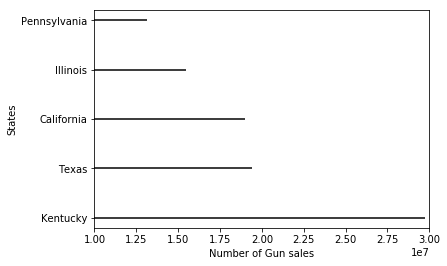

Index(['Kentucky', 'Texas', 'California', 'Illinois', 'Pennsylvania'], dtype='object', name='state')

In [265]:
top_gun_sales=gun_data.groupby('state').agg({'totals':'sum'}).sort_values(by='totals',ascending=False).head(5)
x=top_gun_sales['totals']
y=top_gun_sales.index
plt.xlabel('Number of Gun sales')
plt.ylabel('States')
plt.xlim((10000000,30000000))
for i in range(len(y)):
    plt.hlines(y[i],0,x[i])
plt.show()
top_gun_sales.index

###### Question 2:Top 5 years with maximum number of Gun purchases

In [266]:
yearly_sales=gun_data.groupby(gun_data['month'].astype(str).str.split('-', expand=True)[0]).agg({'totals':'sum'}).sort_values(by='totals',ascending=False).head(5)
yearly_sales

,totals
0,
2016,27425512
2015,23026288
2013,20966704
2014,20860241
2012,19463832


###### Question 3: What is the most popular gun for each year

In [267]:

test3=gun_data.groupby(gun_data['month'].astype(str).str.split('-',expand=True)[0])['handgun','long_gun',
       'other','multiple','admin','prepawn_handgun','prepawn_long_gun',
       'prepawn_other','redemption_handgun','redemption_long_gun',
       'redemption_other','returned_handgun','returned_long_gun',
       'returned_other','rentals_handgun','rentals_long_gun',
       'private_sale_handgun','private_sale_long_gun','private_sale_other'].agg('sum')
test3.idxmax(axis=1)

0
1998    long_gun
1999    long_gun
2000    long_gun
2001    long_gun
2002    long_gun
2003    long_gun
2004    long_gun
2005    long_gun
2006    long_gun
2007    long_gun
2008    long_gun
2009    long_gun
2010    long_gun
2011    long_gun
2012    long_gun
2013    long_gun
2014     handgun
2015     handgun
2016     handgun
2017     handgun
dtype: object

##### Question 4: Which state has the Highest number of pruchases for persons under 18 years


In [268]:
under_18=census_data[census_data['fact'].str.contains('Persons under 18 years, percent, July 1')]
highest_percentage=under_18.loc[:,'alabama':'wyoming'].iloc[0].max()
state_name=under_18.columns[(under_18==highest_percentage).iloc[0]]
state_name[0]

'utah'

###### Question 5: Which state has the highest gun per capita based on population estimates for year 2016

In [269]:
census_data_index=census_data.iloc[0].index
census_data_index=census_data_index[2:]
#number of total states in census Data 
print('total number of states in census data')
display(len(census_data_index))
unique_state_gun_data=gun_data['state'].str.lower().unique()
print('total number of states in gun_data')
print(len(unique_state_gun_data))
#determining unmtached states in gun_data
diff=[]
for g_state in unique_state_gun_data:
    if(g_state not in census_data_index):
        diff.append(g_state)

print('states that are in gun_data but not in census data')
print(diff)


total number of states in census data


50

total number of states in gun_data
55
states that are in gun_data but not in census data
['district of columbia', 'guam', 'mariana islands', 'puerto rico', 'virgin islands']


In [270]:
#removing these states from gun_data
gun_data['state']=gun_data['state'].str.lower()
#since we are trying to find out the gun capita for year 2016, we are grouping the totals by state and month for 2016 
gun_grouped_data=gun_data.groupby([gun_data['month'].astype(str).str.split('-', expand=True)[0],'state']).agg({'totals':'sum'})
gun_tot_2016 = gun_grouped_data.loc[:,'totals']['2016'].to_frame()
#removing the states that are in gun_data but on in census data from gun_tot_2016
gun_tot_2016=gun_tot_2016.query('state != @diff')
avg_2016 = gun_tot_2016.totals/census_data.iloc[1, 2:]
max_gun_capita=max(avg_2016)
display(max_gun_capita)
avg_2016[avg_2016==max_gun_capita].index[0]

919211.75

'kentucky'

#### The highest gun per capita was 919211.75 for Kentucky state in 2016.

###### Question 6: Top 5 states which had the highest growth in gun registrations?

In [271]:
gun_groupby= gun_data.groupby(['month', 'state'])['totals'].sum()
starting_date=gun_data['month'].min()
ending_date=gun_data['month'].max()
diff=gun_groupby.loc[ending_date]-gun_groupby.loc[starting_date]
diff.sort_values(ascending=False).head(5)

state
kentucky        397866
texas           125466
california      121405
illinois        116427
pennsylvania     76986
Name: totals, dtype: int32

###### Question:7 What is the overall trend of gun purchases?

Text(0, 0.5, 'Totals')

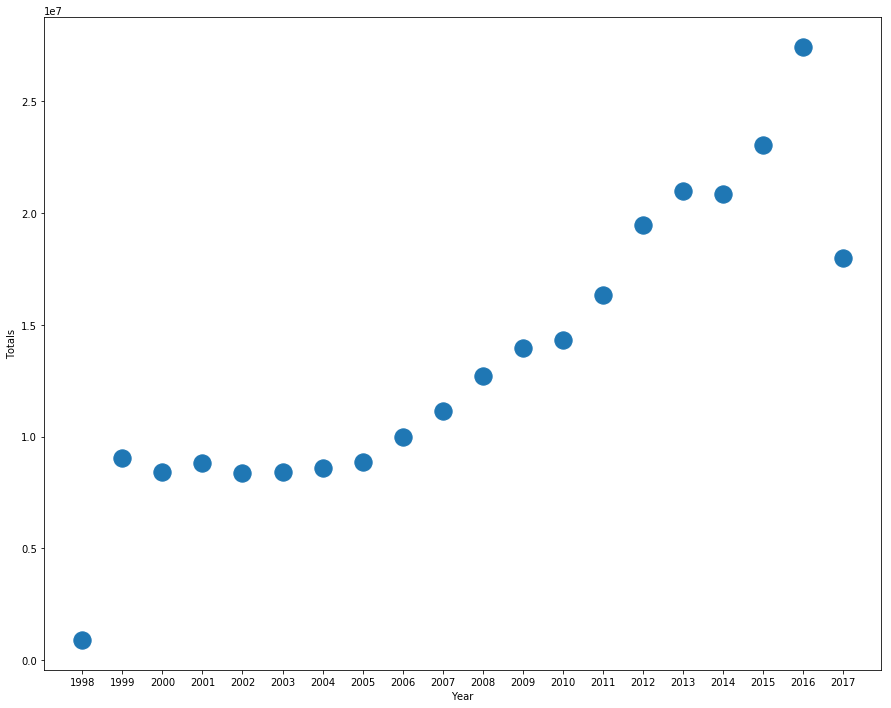

In [20]:
yearly_purchases=gun_data.groupby(gun_data['month'].astype(str).str.split('-', expand=True)[0]).agg({'totals':'sum'})
plt.figure(figsize=(15,12))
plt.scatter(yearly_purchases.index,yearly_purchases['totals'],s=300)
plt.xlabel('Year')
plt.ylabel('Totals')

###### Question:8 List 10 states with high gun registrations in 2010 and 2011

In [273]:
sales_yearly=gun_data[gun_data['month'].between('2010-01','2011-12')]
sales_yearly.groupby('state').agg({'totals':'sum'}).sort_values(by='totals',ascending=False).head(10)


,totals
state,
kentucky,4666411
texas,2123458
california,1722100
utah,1573923
illinois,1524262
pennsylvania,1345611
florida,1202576
ohio,862224
tennessee,862131


###### Total Number of permits

In [17]:
gun_data['permit'].sum()


79920236.0

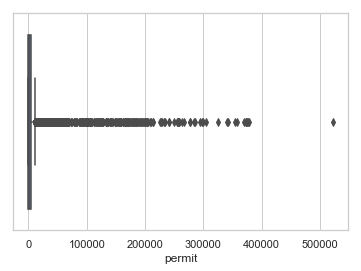

In [25]:
sn.set(style="whitegrid")
ax = sn.boxplot(x=gun_data['permit'])

<a id='conclusions'></a>
## Conclusions

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. A detailed analysis has been carried out to draw insights from the data that was given. Research questions were formulated prior to the start of the analysis which drove the entire analysis. Over Kentucky seems to be leading in the number of background checks and the long gun seems to be the most popular gun for many years. There seems to be inconsistency in the data that has been provided, there are some states missing in census data which are in gun data, to maintain consistency I removed those states from gun data as well when performing the analysis. The overall trend of gun purchases seems to be increasing states that are in gun_data but not in census data



In [274]:
census_data.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",N/A,4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,"Population estimates base, April 1, 2010, (V2...",N/A,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
2,"Population, percent change - April 1, 2010 (es...",N/A,1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",N/A,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814180.0,6346105.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
4,"Persons under 5 years, percent, July 1, 2016, ...",N/A,6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0
